Checking: c:\Users\capel\Desktop\IPSSI\Semaine14 - Hadoop & Spark\WeatherFM\data\lastfm_weather.db
📊 800 points de données chargés
🔍 Statistiques descriptives:
       temperature    humidity    listeners  playcount
count   800.000000  800.000000   800.000000      800.0
mean      2.301125   80.712500  3620.202500        0.0
std       3.954368   14.510963  1309.464181        0.0
min      -4.330000   43.000000  2751.000000        0.0
25%      -0.480000   71.500000  2907.000000        0.0
50%       2.815000   84.000000  3206.500000        0.0
75%       3.750000   93.250000  3627.000000        0.0
max      10.130000   98.000000  8220.000000        0.0

🌤️ Table de contingence Météo-Humeur:
mood_category  neutral
weather_main          
Clear               20
Clouds             510
Mist                50
Rain                80
Snow               140


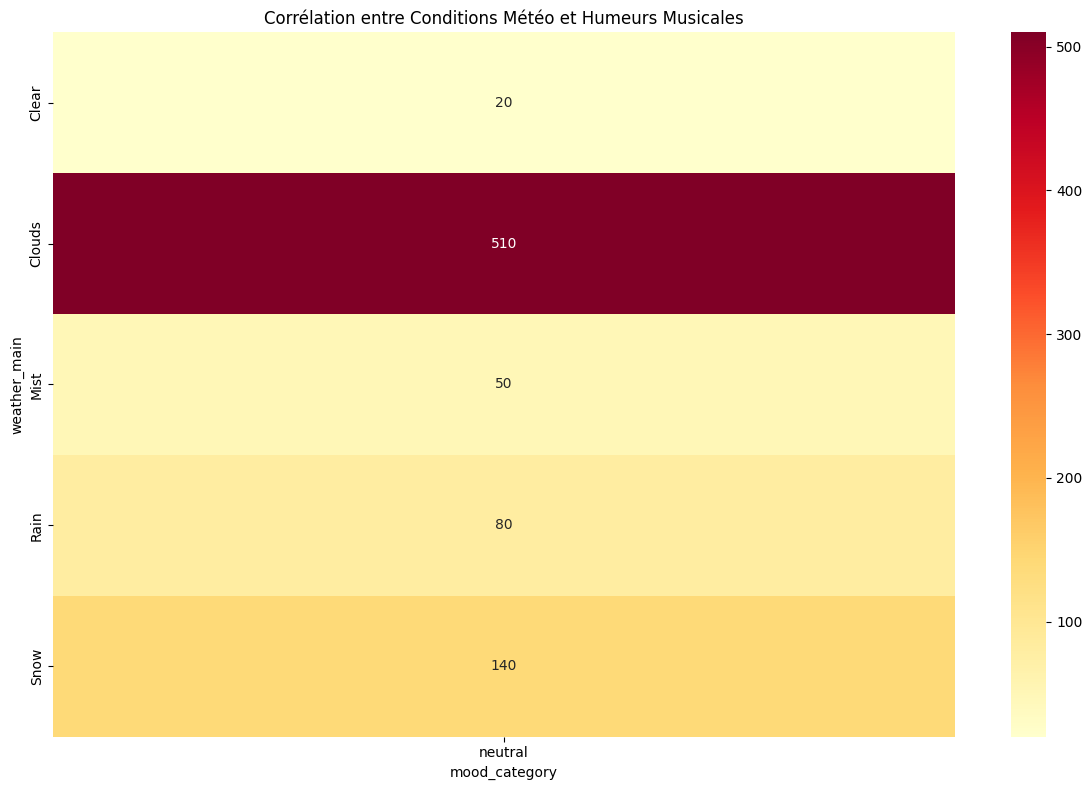

In [2]:
# notebooks/data_analysis.ipynb
import os, sqlite3, pandas as pd, numpy as np

# Notebook VSCode = environnement local Windows
project_root = os.path.abspath("..")  # remonte depuis /notebooks/
local_db_path = os.path.join(project_root, "data", "lastfm_weather.db")

print("Checking:", local_db_path)
assert os.path.exists(local_db_path), "DB not found"

db_path = local_db_path

conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM city_music_trends LIMIT 10", conn)
df.head()
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chargement des données
df = pd.read_sql_query("""
    SELECT 
        city,
        track_name,
        artist_name,
        mood_category,
        weather_main,
        temperature,
        humidity,
        listeners,
        playcount
    FROM city_music_trends
    WHERE timestamp >= datetime('now', '-30 days')
""", conn)

print(f"📊 {len(df)} points de données chargés")

# Analyse exploratoire
print("🔍 Statistiques descriptives:")
print(df.describe())

# Corrélation météo-humeur
weather_mood_corr = pd.crosstab(df['weather_main'], df['mood_category'])
print("\n🌤️ Table de contingence Météo-Humeur:")
print(weather_mood_corr)

# Visualisation
plt.figure(figsize=(12, 8))
sns.heatmap(weather_mood_corr, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Corrélation entre Conditions Météo et Humeurs Musicales')
plt.tight_layout()
plt.show()

In [3]:
import os
print("CWD:", os.getcwd())

CWD: c:\Users\capel\Desktop\IPSSI\Semaine14 - Hadoop & Spark\WeatherFM\notebooks
